The following code generates a numerical solution and plots corresponding to the classical SIR Epidemic Model as given by the following system of nonlinear differential equations.

$$s^{\prime}(t) = -\beta s(t) i(t),$$

$$i^{\prime}(t) = \beta s(t) i(t) - \gamma i(t),$$

$$r^{\prime}(t) = \gamma i(t),$$

where for $t \ge 0$, $s(t)$ is the proportion of a population susceptible to infection, $i(t)$ is the proportion of a population that is infectious, $r(t)$ is the proportion of a population that is recovered from infection and now non-susceptible. Here, $\beta$ is the infection rate, and $\gamma$ is the recovery rate.
Note that the fundamental reproduction rate given by

$R_0 = \frac{\beta}{\gamma}$,

and the infection becomes super-critical when $R_0 > 1$.


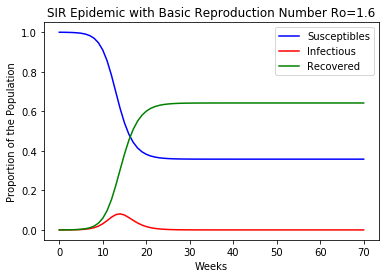

In [6]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

beta = 1.6 # average infection rate
gamma = 1.0 # average recovery rate
Ro = beta / gamma # basic reprodction number
#print('Ro = ',Ro)
I0 = .0001
ND = 70 # number of weeks
TS = 1.0 # time in weeks
INPUT = (1.0-I0, I0, 0.0)

def diff_eqs(INP,t):
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#print(RES)

#plt.title('f model: T=%i' %t)



#Ploting
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infectious')
pl.plot(RES[:,2], '-g', label='Recovered')
pl.legend(loc=0)
pl.title('SIR Epidemic with Basic Reproduction Number Ro={}'.format(Ro))
pl.xlabel('Weeks')
pl.ylabel('Proportion of the Population')
pl.savefig('2.5-SIS-high.png', dpi=900) # This does increase the resolution.
pl.show()